In [1]:
import argparse
import pandas as pd
import numpy as np
import os
import sys  
sys.path.insert(0, './MAIN/')
from utils import *
from GNN_MME import *
from train import *
import preprocess_functions

import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold , train_test_split
import networkx as nx
import torch
from datetime import datetime
import joblib
import warnings
import gc
from palettable import wesanderson
warnings.filterwarnings("ignore")

print("Finished Library Import \n")

Finished Library Import 



In [4]:
data_input = './data/TCGA/BRCA/raw/'
snf_net = 'RPPA_mRNA_graph.graphml'
index_col = 'patient'
target = 'paper_BRCA_Subtype_PAM50'

Using cuda device
Total = 11.5Gb 	 Reserved = 0.0Gb 	 Allocated = 0.0Gb
StratifiedKFold(n_splits=2, random_state=None, shuffle=True)
Performing Logistic Regression for Feature Selection


Loss : 0.6044: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 115.26epoch/s]


Model score : 0.875


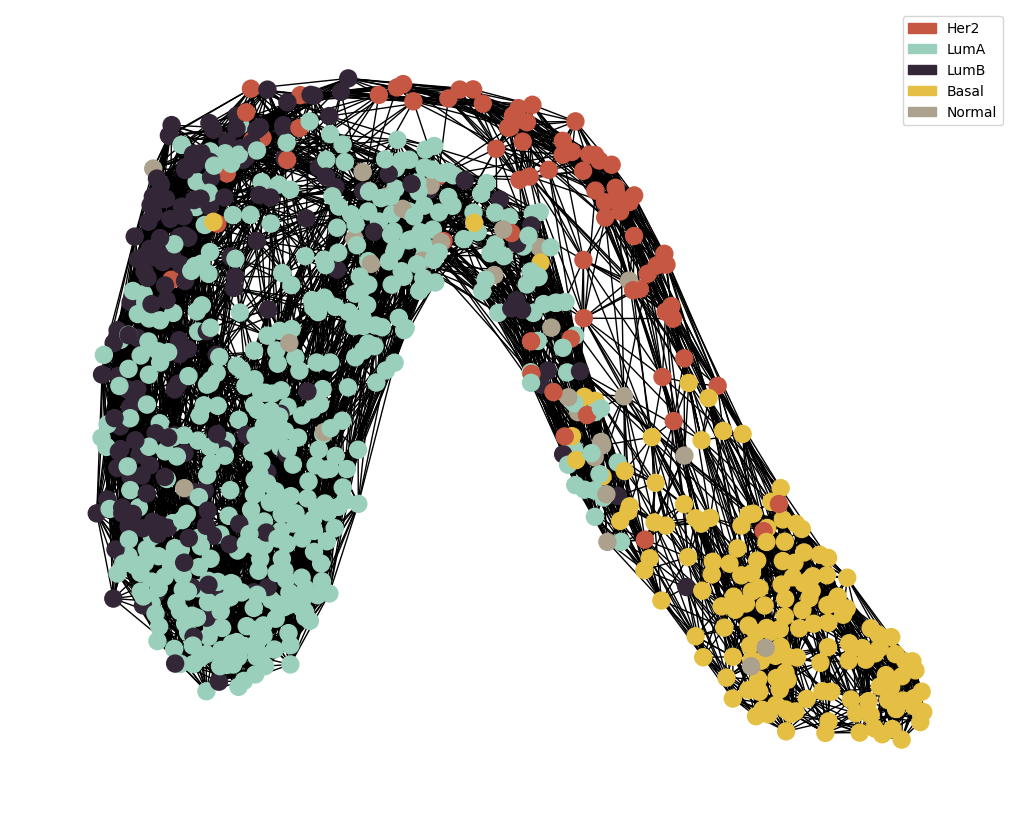

Performing Differential Gene Expression for Feature Selection
Keeping 29995 genes
Removed 30665 genes
Keeping 1047 Samples
Removed 36 Samples


Fitting size factors...
... done in 1.15 seconds.

Fitting dispersions...
... done in 77.26 seconds.

Fitting dispersion trend curve...
... done in 0.93 seconds.

Fitting MAP dispersions...
... done in 81.69 seconds.

Fitting LFCs...
... done in 55.56 seconds.

Replacing 2948 outlier genes.

Fitting dispersions...
... done in 7.98 seconds.

Fitting MAP dispersions...
... done in 7.48 seconds.

Fitting LFCs...
... done in 8.41 seconds.



Performing contrastive analysis for LumA vs. Her2


Running Wald tests...
... done in 36.53 seconds.



Log2 fold change & Wald test p-value: paper-BRCA-Subtype-PAM50 LumA vs Her2
                       baseMean  log2FoldChange     lfcSE      stat  \
ENSG00000000003.15  3087.392130       -0.045843  0.109944 -0.416972   
ENSG00000000005.6     72.999641        2.364056  0.293465  8.055672   
ENSG00000000419.13  2386.496112       -0.604066  0.062602 -9.649258   
ENSG00000000457.14  1596.783158       -0.062327  0.063247 -0.985453   
ENSG00000000460.17   715.140714       -0.435593  0.080773 -5.392794   
...                         ...             ...       ...       ...   
ENSG00000288658.1     22.532026       -0.955682  0.240269 -3.977558   
ENSG00000288663.1     29.867524        0.627702  0.099567  6.304315   
ENSG00000288670.1    422.158728       -0.075705  0.079346 -0.954105   
ENSG00000288674.1      8.197550        0.337858  0.120301  2.808438   
ENSG00000288675.1     32.370671       -0.912699  0.116411 -7.840289   

                          pvalue          padj  
ENSG00000000003.15  6.

Running Wald tests...
... done in 36.84 seconds.



Log2 fold change & Wald test p-value: paper-BRCA-Subtype-PAM50 LumA vs LumB
                       baseMean  log2FoldChange     lfcSE       stat  \
ENSG00000000003.15  3087.392130        0.510947  0.075755   6.744708   
ENSG00000000005.6     72.999641        0.680790  0.200628   3.393292   
ENSG00000000419.13  2386.496112       -0.496193  0.043131 -11.504244   
ENSG00000000457.14  1596.783158        0.070789  0.043570   1.624719   
ENSG00000000460.17   715.140714       -0.607113  0.055622 -10.914921   
...                         ...             ...       ...        ...   
ENSG00000288658.1     22.532026       -0.808325  0.165651  -4.879701   
ENSG00000288663.1     29.867524       -0.053662  0.066356  -0.808702   
ENSG00000288670.1    422.158728       -0.228263  0.054607  -4.180138   
ENSG00000288674.1      8.197550        0.269729  0.080393   3.355137   
ENSG00000288675.1     32.370671        0.324366  0.081632   3.973539   

                          pvalue          padj  
ENSG000000

Running Wald tests...
... done in 36.56 seconds.



Log2 fold change & Wald test p-value: paper-BRCA-Subtype-PAM50 LumA vs Normal
                       baseMean  log2FoldChange     lfcSE      stat  \
ENSG00000000003.15  3087.392130       -0.149391  0.151267 -0.987602   
ENSG00000000005.6     72.999641       -0.070272  0.400423 -0.175495   
ENSG00000000419.13  2386.496112        0.052635  0.086204  0.610591   
ENSG00000000457.14  1596.783158        0.460586  0.087118  5.286913   
ENSG00000000460.17   715.140714        0.442141  0.111457  3.966909   
...                         ...             ...       ...       ...   
ENSG00000288658.1     22.532026       -0.735339  0.331180 -2.220362   
ENSG00000288663.1     29.867524        0.106228  0.134478  0.789925   
ENSG00000288670.1    422.158728        0.475525  0.109506  4.342478   
ENSG00000288674.1      8.197550       -0.105403  0.159991 -0.658811   
ENSG00000288675.1     32.370671       -0.340401  0.161826 -2.103502   

                          pvalue      padj  
ENSG00000000003.15  3.23

Running Wald tests...
... done in 36.36 seconds.



Log2 fold change & Wald test p-value: paper-BRCA-Subtype-PAM50 LumA vs Basal
                       baseMean  log2FoldChange     lfcSE       stat  \
ENSG00000000003.15  3087.392130       -0.445231  0.080360  -5.540470   
ENSG00000000005.6     72.999641        0.121811  0.212744   0.572570   
ENSG00000000419.13  2386.496112       -0.502644  0.045765 -10.983185   
ENSG00000000457.14  1596.783158        0.450413  0.046261   9.736325   
ENSG00000000460.17   715.140714       -1.016645  0.058992 -17.233550   
...                         ...             ...       ...        ...   
ENSG00000288658.1     22.532026       -1.948089  0.174997 -11.132159   
ENSG00000288663.1     29.867524        0.589213  0.072151   8.166405   
ENSG00000288670.1    422.158728        0.042231  0.058005   0.728062   
ENSG00000288674.1      8.197550        0.081888  0.085157   0.961607   
ENSG00000288675.1     32.370671       -0.328268  0.085826  -3.824822   

                          pvalue          padj  
ENSG00000

Running Wald tests...
... done in 36.44 seconds.



Log2 fold change & Wald test p-value: paper-BRCA-Subtype-PAM50 Her2 vs LumB
                       baseMean  log2FoldChange     lfcSE      stat  \
ENSG00000000003.15  3087.392130        0.556791  0.121299  4.590231   
ENSG00000000005.6     72.999641       -1.683266  0.323369 -5.205405   
ENSG00000000419.13  2386.496112        0.107873  0.069058  1.562060   
ENSG00000000457.14  1596.783158        0.133116  0.069775  1.907793   
ENSG00000000460.17   715.140714       -0.171520  0.089082 -1.925423   
...                         ...             ...       ...       ...   
ENSG00000288658.1     22.532026        0.147357  0.264721  0.556650   
ENSG00000288663.1     29.867524       -0.681364  0.109132 -6.243509   
ENSG00000288670.1    422.158728       -0.152558  0.087504 -1.743435   
ENSG00000288674.1      8.197550       -0.068130  0.132312 -0.514919   
ENSG00000288675.1     32.370671        1.237065  0.128962  9.592484   

                          pvalue          padj  
ENSG00000000003.15  4.

Running Wald tests...
... done in 36.49 seconds.



Log2 fold change & Wald test p-value: paper-BRCA-Subtype-PAM50 Her2 vs Normal
                       baseMean  log2FoldChange     lfcSE      stat  \
ENSG00000000003.15  3087.392130       -0.103548  0.178483 -0.580154   
ENSG00000000005.6     72.999641       -2.434328  0.473977 -5.135962   
ENSG00000000419.13  2386.496112        0.656701  0.101685  6.458201   
ENSG00000000457.14  1596.783158        0.522913  0.102761  5.088647   
ENSG00000000460.17   715.140714        0.877735  0.131394  6.680155   
...                         ...             ...       ...       ...   
ENSG00000288658.1     22.532026        0.220343  0.390279  0.564578   
ENSG00000288663.1     29.867524       -0.521474  0.159972 -3.259782   
ENSG00000288670.1    422.158728        0.551230  0.129099  4.269817   
ENSG00000288674.1      8.197550       -0.443262  0.191417 -2.315689   
ENSG00000288675.1     32.370671        0.572297  0.190145  3.009796   

                          pvalue          padj  
ENSG00000000003.15  

Running Wald tests...
... done in 36.53 seconds.



Log2 fold change & Wald test p-value: paper-BRCA-Subtype-PAM50 Her2 vs Basal
                       baseMean  log2FoldChange     lfcSE      stat  \
ENSG00000000003.15  3087.392130       -0.399387  0.124227 -3.214986   
ENSG00000000005.6     72.999641       -2.242245  0.331022 -6.773695   
ENSG00000000419.13  2386.496112        0.101422  0.070733  1.433869   
ENSG00000000457.14  1596.783158        0.512741  0.071486  7.172567   
ENSG00000000460.17   715.140714       -0.581052  0.091224 -6.369511   
...                         ...             ...       ...       ...   
ENSG00000288658.1     22.532026       -0.992407  0.270668 -3.666515   
ENSG00000288663.1     29.867524       -0.038489  0.112749 -0.341369   
ENSG00000288670.1    422.158728        0.117936  0.089665  1.315301   
ENSG00000288674.1      8.197550       -0.255971  0.135260 -1.892441   
ENSG00000288675.1     32.370671        0.584431  0.131657  4.439053   

                          pvalue          padj  
ENSG00000000003.15  1

Running Wald tests...
... done in 36.42 seconds.



Log2 fold change & Wald test p-value: paper-BRCA-Subtype-PAM50 LumB vs Normal
                       baseMean  log2FoldChange     lfcSE      stat  \
ENSG00000000003.15  3087.392130       -0.660339  0.159710 -4.134599   
ENSG00000000005.6     72.999641       -0.751062  0.422829 -1.776279   
ENSG00000000419.13  2386.496112        0.548828  0.091000  6.031051   
ENSG00000000457.14  1596.783158        0.389797  0.091967  4.238457   
ENSG00000000460.17   715.140714        1.049255  0.117618  8.920864   
...                         ...             ...       ...       ...   
ENSG00000288658.1     22.532026        0.072986  0.349326  0.208934   
ENSG00000288663.1     29.867524        0.159890  0.141706  1.128321   
ENSG00000288670.1    422.158728        0.703788  0.115554  6.090572   
ENSG00000288674.1      8.197550       -0.375132  0.169207 -2.216999   
ENSG00000288675.1     32.370671       -0.664767  0.171077 -3.885789   

                          pvalue          padj  
ENSG00000000003.15  

Running Wald tests...
... done in 36.62 seconds.



Log2 fold change & Wald test p-value: paper-BRCA-Subtype-PAM50 LumB vs Basal
                       baseMean  log2FoldChange     lfcSE       stat  \
ENSG00000000003.15  3087.392130       -0.956178  0.095308 -10.032556   
ENSG00000000005.6     72.999641       -0.558979  0.252400  -2.214653   
ENSG00000000419.13  2386.496112       -0.006451  0.054263  -0.118890   
ENSG00000000457.14  1596.783158        0.379624  0.054849   6.921276   
ENSG00000000460.17   715.140714       -0.409531  0.069938  -5.855631   
...                         ...             ...       ...        ...   
ENSG00000288658.1     22.532026       -1.139764  0.207297  -5.498214   
ENSG00000288663.1     29.867524        0.642875  0.084864   7.575381   
ENSG00000288670.1    422.158728        0.270494  0.068745   3.934776   
ENSG00000288674.1      8.197550       -0.187841  0.101419  -1.852131   
ENSG00000288675.1     32.370671       -0.652634  0.102204  -6.385619   

                          pvalue          padj  
ENSG00000

Running Wald tests...
... done in 36.44 seconds.



Log2 fold change & Wald test p-value: paper-BRCA-Subtype-PAM50 Normal vs Basal
                       baseMean  log2FoldChange     lfcSE       stat  \
ENSG00000000003.15  3087.392130       -0.295840  0.161945  -1.826789   
ENSG00000000005.6     72.999641        0.192083  0.428711   0.448048   
ENSG00000000419.13  2386.496112       -0.555279  0.092278  -6.017477   
ENSG00000000457.14  1596.783158       -0.010172  0.093272  -0.109060   
ENSG00000000460.17   715.140714       -1.458786  0.119249 -12.233145   
...                         ...             ...       ...        ...   
ENSG00000288658.1     22.532026       -1.212750  0.353853  -3.427268   
ENSG00000288663.1     29.867524        0.482985  0.144510   3.342219   
ENSG00000288670.1    422.158728       -0.433294  0.117198  -3.697107   
ENSG00000288674.1      8.197550        0.187291  0.171522   1.091937   
ENSG00000288675.1     32.370671        0.012134  0.173117   0.070089   

                          pvalue          padj  
ENSG000

Fitting dispersions...
... done in 65.02 seconds.

Fitting dispersion trend curve...
... done in 0.89 seconds.



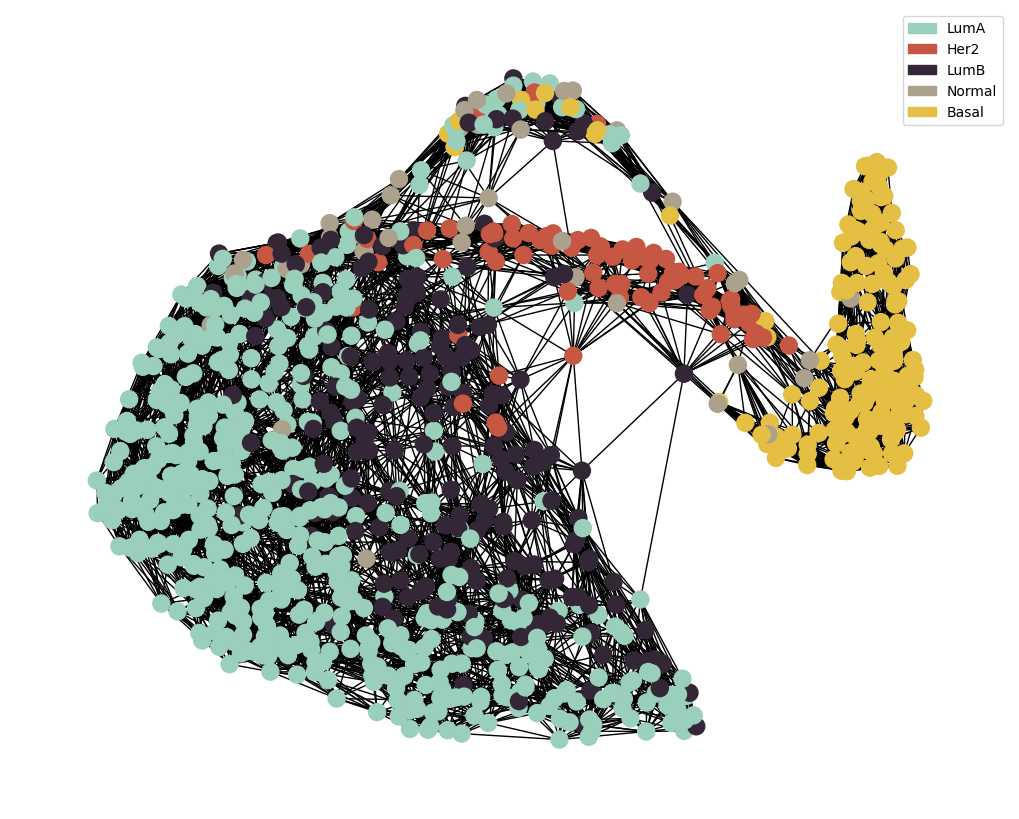

Clearing gpu memory
Total = 11.5Gb 	 Reserved = 0.0Gb 	 Allocated = 0.0Gb


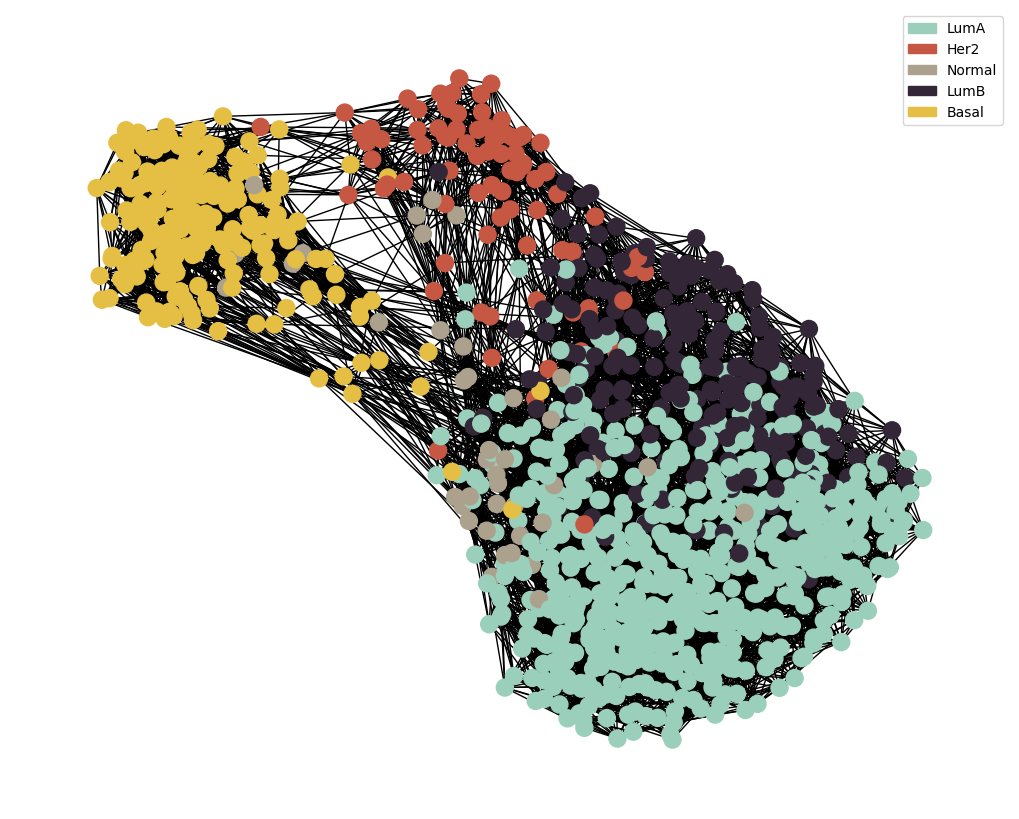

GCN_MME(
  (encoder_dims): ModuleList(
    (0): Encoder(
      (encoder): ModuleList(
        (0): Linear(in_features=464, out_features=500, bias=True)
        (1): Linear(in_features=500, out_features=16, bias=True)
      )
      (norm): ModuleList(
        (0): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (decoder): Sequential(
        (0): Linear(in_features=16, out_features=64, bias=True)
      )
      (drop): Dropout(p=0.5, inplace=False)
    )
    (1): Encoder(
      (encoder): ModuleList(
        (0): Linear(in_features=29995, out_features=500, bias=True)
        (1): Linear(in_features=500, out_features=16, bias=True)
      )
      (norm): ModuleList(
        (0): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

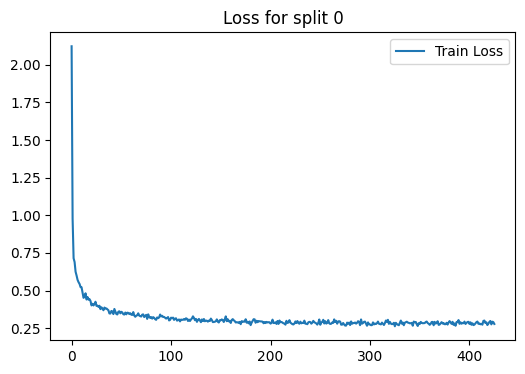

Fold : 1 | Test Accuracy = 0.8361 | F1 = 0.8018 
Total = 11.5Gb 	 Reserved = 0.8Gb 	 Allocated = 0.3Gb
Clearing gpu memory
Total = 11.5Gb 	 Reserved = 0.3Gb 	 Allocated = 0.3Gb
Performing Logistic Regression for Feature Selection


Loss : 0.6042: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 159.70epoch/s]


Model score : 0.876


<Figure size 640x480 with 0 Axes>

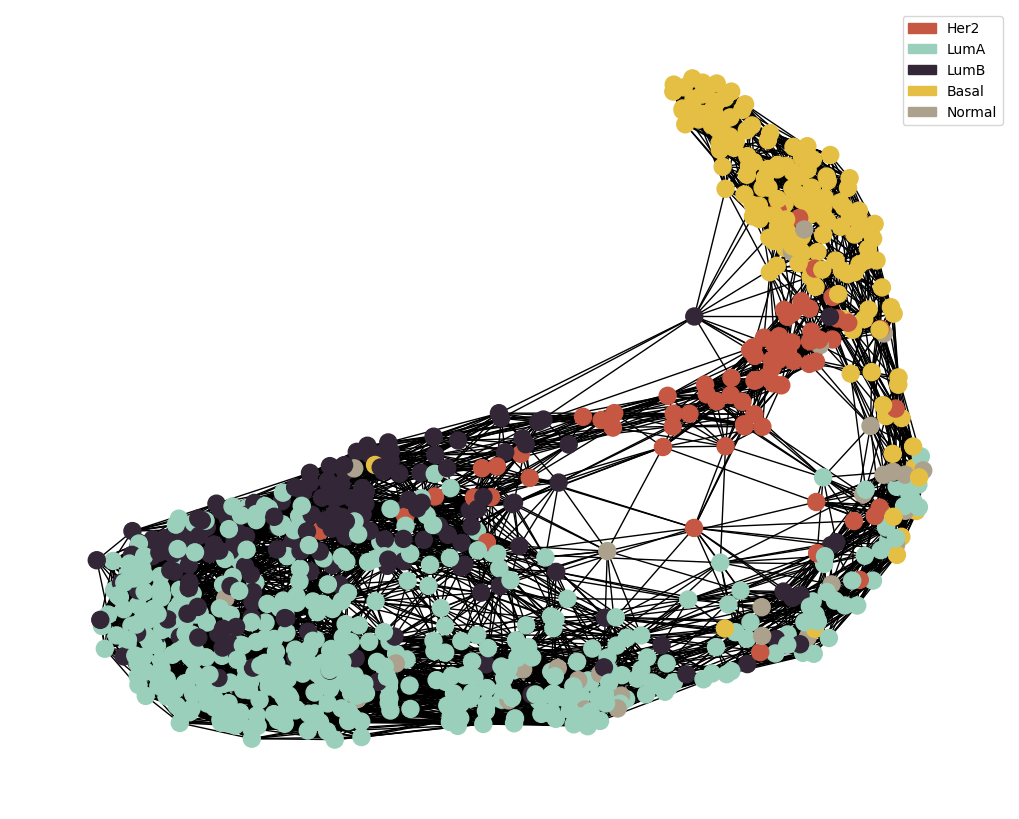

Performing Differential Gene Expression for Feature Selection
Keeping 29995 genes
Removed 30665 genes
Keeping 1047 Samples
Removed 36 Samples


Fitting size factors...
... done in 1.24 seconds.

Fitting dispersions...
... done in 76.31 seconds.

Fitting dispersion trend curve...
... done in 0.95 seconds.

Fitting MAP dispersions...
... done in 81.82 seconds.

Fitting LFCs...
... done in 55.25 seconds.

Replacing 2948 outlier genes.

Fitting dispersions...
... done in 7.96 seconds.

Fitting MAP dispersions...
... done in 7.46 seconds.

Fitting LFCs...
... done in 8.35 seconds.



Performing contrastive analysis for LumA vs. Her2


Running Wald tests...
... done in 36.11 seconds.



Log2 fold change & Wald test p-value: paper-BRCA-Subtype-PAM50 LumA vs Her2
                       baseMean  log2FoldChange     lfcSE      stat  \
ENSG00000000003.15  3087.392130       -0.045843  0.109944 -0.416972   
ENSG00000000005.6     72.999641        2.364056  0.293465  8.055672   
ENSG00000000419.13  2386.496112       -0.604066  0.062602 -9.649258   
ENSG00000000457.14  1596.783158       -0.062327  0.063247 -0.985453   
ENSG00000000460.17   715.140714       -0.435593  0.080773 -5.392794   
...                         ...             ...       ...       ...   
ENSG00000288658.1     22.532026       -0.955682  0.240269 -3.977558   
ENSG00000288663.1     29.867524        0.627702  0.099567  6.304315   
ENSG00000288670.1    422.158728       -0.075705  0.079346 -0.954105   
ENSG00000288674.1      8.197550        0.337858  0.120301  2.808438   
ENSG00000288675.1     32.370671       -0.912699  0.116411 -7.840289   

                          pvalue          padj  
ENSG00000000003.15  6.

Running Wald tests...
... done in 36.85 seconds.



Log2 fold change & Wald test p-value: paper-BRCA-Subtype-PAM50 LumA vs LumB
                       baseMean  log2FoldChange     lfcSE       stat  \
ENSG00000000003.15  3087.392130        0.510947  0.075755   6.744708   
ENSG00000000005.6     72.999641        0.680790  0.200628   3.393292   
ENSG00000000419.13  2386.496112       -0.496193  0.043131 -11.504244   
ENSG00000000457.14  1596.783158        0.070789  0.043570   1.624719   
ENSG00000000460.17   715.140714       -0.607113  0.055622 -10.914921   
...                         ...             ...       ...        ...   
ENSG00000288658.1     22.532026       -0.808325  0.165651  -4.879701   
ENSG00000288663.1     29.867524       -0.053662  0.066356  -0.808702   
ENSG00000288670.1    422.158728       -0.228263  0.054607  -4.180138   
ENSG00000288674.1      8.197550        0.269729  0.080393   3.355137   
ENSG00000288675.1     32.370671        0.324366  0.081632   3.973539   

                          pvalue          padj  
ENSG000000

Running Wald tests...
... done in 36.32 seconds.



Log2 fold change & Wald test p-value: paper-BRCA-Subtype-PAM50 LumA vs Normal
                       baseMean  log2FoldChange     lfcSE      stat  \
ENSG00000000003.15  3087.392130       -0.149391  0.151267 -0.987602   
ENSG00000000005.6     72.999641       -0.070272  0.400423 -0.175495   
ENSG00000000419.13  2386.496112        0.052635  0.086204  0.610591   
ENSG00000000457.14  1596.783158        0.460586  0.087118  5.286913   
ENSG00000000460.17   715.140714        0.442141  0.111457  3.966909   
...                         ...             ...       ...       ...   
ENSG00000288658.1     22.532026       -0.735339  0.331180 -2.220362   
ENSG00000288663.1     29.867524        0.106228  0.134478  0.789925   
ENSG00000288670.1    422.158728        0.475525  0.109506  4.342478   
ENSG00000288674.1      8.197550       -0.105403  0.159991 -0.658811   
ENSG00000288675.1     32.370671       -0.340401  0.161826 -2.103502   

                          pvalue      padj  
ENSG00000000003.15  3.23

Running Wald tests...
... done in 36.66 seconds.



Log2 fold change & Wald test p-value: paper-BRCA-Subtype-PAM50 LumA vs Basal
                       baseMean  log2FoldChange     lfcSE       stat  \
ENSG00000000003.15  3087.392130       -0.445231  0.080360  -5.540470   
ENSG00000000005.6     72.999641        0.121811  0.212744   0.572570   
ENSG00000000419.13  2386.496112       -0.502644  0.045765 -10.983185   
ENSG00000000457.14  1596.783158        0.450413  0.046261   9.736325   
ENSG00000000460.17   715.140714       -1.016645  0.058992 -17.233550   
...                         ...             ...       ...        ...   
ENSG00000288658.1     22.532026       -1.948089  0.174997 -11.132159   
ENSG00000288663.1     29.867524        0.589213  0.072151   8.166405   
ENSG00000288670.1    422.158728        0.042231  0.058005   0.728062   
ENSG00000288674.1      8.197550        0.081888  0.085157   0.961607   
ENSG00000288675.1     32.370671       -0.328268  0.085826  -3.824822   

                          pvalue          padj  
ENSG00000

Running Wald tests...
... done in 36.62 seconds.



Log2 fold change & Wald test p-value: paper-BRCA-Subtype-PAM50 Her2 vs LumB
                       baseMean  log2FoldChange     lfcSE      stat  \
ENSG00000000003.15  3087.392130        0.556791  0.121299  4.590231   
ENSG00000000005.6     72.999641       -1.683266  0.323369 -5.205405   
ENSG00000000419.13  2386.496112        0.107873  0.069058  1.562060   
ENSG00000000457.14  1596.783158        0.133116  0.069775  1.907793   
ENSG00000000460.17   715.140714       -0.171520  0.089082 -1.925423   
...                         ...             ...       ...       ...   
ENSG00000288658.1     22.532026        0.147357  0.264721  0.556650   
ENSG00000288663.1     29.867524       -0.681364  0.109132 -6.243509   
ENSG00000288670.1    422.158728       -0.152558  0.087504 -1.743435   
ENSG00000288674.1      8.197550       -0.068130  0.132312 -0.514919   
ENSG00000288675.1     32.370671        1.237065  0.128962  9.592484   

                          pvalue          padj  
ENSG00000000003.15  4.

Running Wald tests...
... done in 36.48 seconds.



Log2 fold change & Wald test p-value: paper-BRCA-Subtype-PAM50 Her2 vs Normal
                       baseMean  log2FoldChange     lfcSE      stat  \
ENSG00000000003.15  3087.392130       -0.103548  0.178483 -0.580154   
ENSG00000000005.6     72.999641       -2.434328  0.473977 -5.135962   
ENSG00000000419.13  2386.496112        0.656701  0.101685  6.458201   
ENSG00000000457.14  1596.783158        0.522913  0.102761  5.088647   
ENSG00000000460.17   715.140714        0.877735  0.131394  6.680155   
...                         ...             ...       ...       ...   
ENSG00000288658.1     22.532026        0.220343  0.390279  0.564578   
ENSG00000288663.1     29.867524       -0.521474  0.159972 -3.259782   
ENSG00000288670.1    422.158728        0.551230  0.129099  4.269817   
ENSG00000288674.1      8.197550       -0.443262  0.191417 -2.315689   
ENSG00000288675.1     32.370671        0.572297  0.190145  3.009796   

                          pvalue          padj  
ENSG00000000003.15  

Running Wald tests...
... done in 36.83 seconds.



Log2 fold change & Wald test p-value: paper-BRCA-Subtype-PAM50 Her2 vs Basal
                       baseMean  log2FoldChange     lfcSE      stat  \
ENSG00000000003.15  3087.392130       -0.399387  0.124227 -3.214986   
ENSG00000000005.6     72.999641       -2.242245  0.331022 -6.773695   
ENSG00000000419.13  2386.496112        0.101422  0.070733  1.433869   
ENSG00000000457.14  1596.783158        0.512741  0.071486  7.172567   
ENSG00000000460.17   715.140714       -0.581052  0.091224 -6.369511   
...                         ...             ...       ...       ...   
ENSG00000288658.1     22.532026       -0.992407  0.270668 -3.666515   
ENSG00000288663.1     29.867524       -0.038489  0.112749 -0.341369   
ENSG00000288670.1    422.158728        0.117936  0.089665  1.315301   
ENSG00000288674.1      8.197550       -0.255971  0.135260 -1.892441   
ENSG00000288675.1     32.370671        0.584431  0.131657  4.439053   

                          pvalue          padj  
ENSG00000000003.15  1

Running Wald tests...
... done in 36.48 seconds.



Log2 fold change & Wald test p-value: paper-BRCA-Subtype-PAM50 LumB vs Normal
                       baseMean  log2FoldChange     lfcSE      stat  \
ENSG00000000003.15  3087.392130       -0.660339  0.159710 -4.134599   
ENSG00000000005.6     72.999641       -0.751062  0.422829 -1.776279   
ENSG00000000419.13  2386.496112        0.548828  0.091000  6.031051   
ENSG00000000457.14  1596.783158        0.389797  0.091967  4.238457   
ENSG00000000460.17   715.140714        1.049255  0.117618  8.920864   
...                         ...             ...       ...       ...   
ENSG00000288658.1     22.532026        0.072986  0.349326  0.208934   
ENSG00000288663.1     29.867524        0.159890  0.141706  1.128321   
ENSG00000288670.1    422.158728        0.703788  0.115554  6.090572   
ENSG00000288674.1      8.197550       -0.375132  0.169207 -2.216999   
ENSG00000288675.1     32.370671       -0.664767  0.171077 -3.885789   

                          pvalue          padj  
ENSG00000000003.15  

Running Wald tests...
... done in 36.60 seconds.



Log2 fold change & Wald test p-value: paper-BRCA-Subtype-PAM50 LumB vs Basal
                       baseMean  log2FoldChange     lfcSE       stat  \
ENSG00000000003.15  3087.392130       -0.956178  0.095308 -10.032556   
ENSG00000000005.6     72.999641       -0.558979  0.252400  -2.214653   
ENSG00000000419.13  2386.496112       -0.006451  0.054263  -0.118890   
ENSG00000000457.14  1596.783158        0.379624  0.054849   6.921276   
ENSG00000000460.17   715.140714       -0.409531  0.069938  -5.855631   
...                         ...             ...       ...        ...   
ENSG00000288658.1     22.532026       -1.139764  0.207297  -5.498214   
ENSG00000288663.1     29.867524        0.642875  0.084864   7.575381   
ENSG00000288670.1    422.158728        0.270494  0.068745   3.934776   
ENSG00000288674.1      8.197550       -0.187841  0.101419  -1.852131   
ENSG00000288675.1     32.370671       -0.652634  0.102204  -6.385619   

                          pvalue          padj  
ENSG00000

Running Wald tests...
... done in 36.60 seconds.



Log2 fold change & Wald test p-value: paper-BRCA-Subtype-PAM50 Normal vs Basal
                       baseMean  log2FoldChange     lfcSE       stat  \
ENSG00000000003.15  3087.392130       -0.295840  0.161945  -1.826789   
ENSG00000000005.6     72.999641        0.192083  0.428711   0.448048   
ENSG00000000419.13  2386.496112       -0.555279  0.092278  -6.017477   
ENSG00000000457.14  1596.783158       -0.010172  0.093272  -0.109060   
ENSG00000000460.17   715.140714       -1.458786  0.119249 -12.233145   
...                         ...             ...       ...        ...   
ENSG00000288658.1     22.532026       -1.212750  0.353853  -3.427268   
ENSG00000288663.1     29.867524        0.482985  0.144510   3.342219   
ENSG00000288670.1    422.158728       -0.433294  0.117198  -3.697107   
ENSG00000288674.1      8.197550        0.187291  0.171522   1.091937   
ENSG00000288675.1     32.370671        0.012134  0.173117   0.070089   

                          pvalue          padj  
ENSG000

Fitting dispersions...
... done in 64.91 seconds.

Fitting dispersion trend curve...
... done in 0.90 seconds.



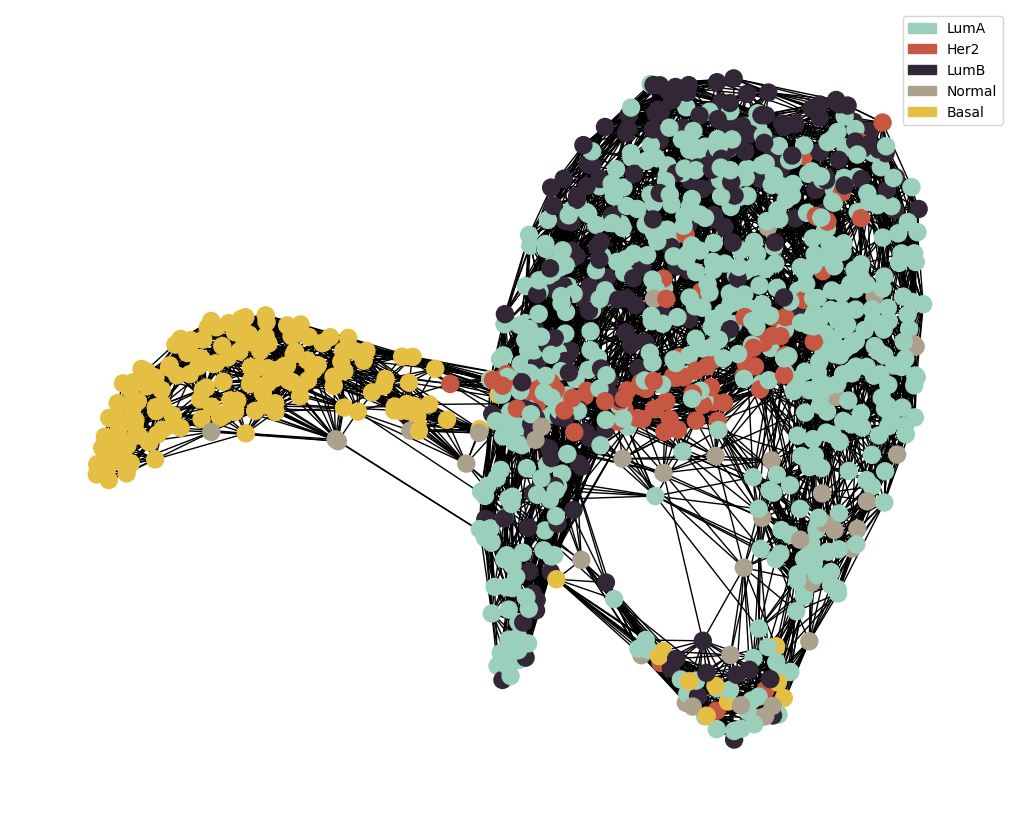

Clearing gpu memory
Total = 11.5Gb 	 Reserved = 0.3Gb 	 Allocated = 0.3Gb


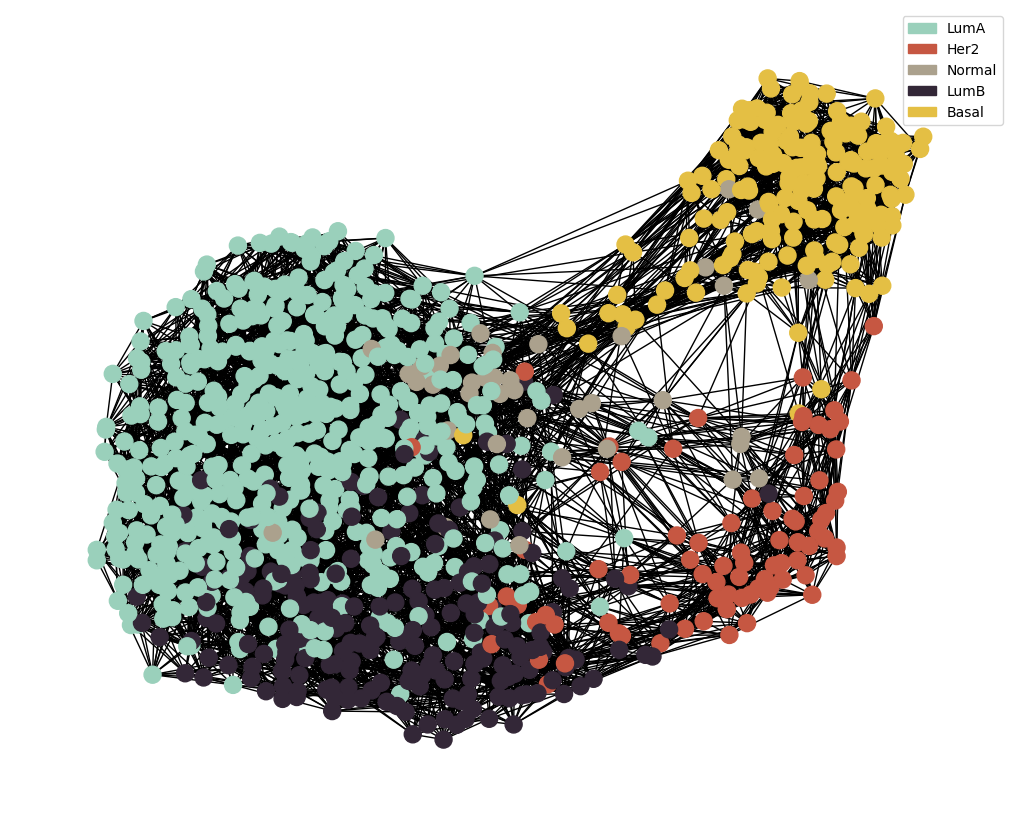

GCN_MME(
  (encoder_dims): ModuleList(
    (0): Encoder(
      (encoder): ModuleList(
        (0): Linear(in_features=464, out_features=500, bias=True)
        (1): Linear(in_features=500, out_features=16, bias=True)
      )
      (norm): ModuleList(
        (0): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (decoder): Sequential(
        (0): Linear(in_features=16, out_features=64, bias=True)
      )
      (drop): Dropout(p=0.5, inplace=False)
    )
    (1): Encoder(
      (encoder): ModuleList(
        (0): Linear(in_features=29995, out_features=500, bias=True)
        (1): Linear(in_features=500, out_features=16, bias=True)
      )
      (norm): ModuleList(
        (0): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

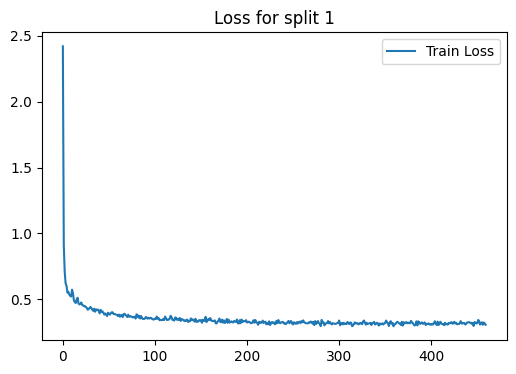

Fold : 2 | Test Accuracy = 0.8571 | F1 = 0.8371 
Total = 11.5Gb 	 Reserved = 1.1Gb 	 Allocated = 0.3Gb
Clearing gpu memory
Total = 11.5Gb 	 Reserved = 0.3Gb 	 Allocated = 0.3Gb


<Figure size 640x480 with 0 Axes>

In [5]:
device = torch.device('cpu' if False else 'cuda') # Get GPU device name, else use CPU
print("Using %s device" % device)
get_gpu_memory()


datModalities , meta = data_parsing(data_input , ['RPPA' , 'mRNA'] , target , index_col , PROCESSED=False)
meta = meta.loc[sorted(meta.index)]

skf = StratifiedKFold(n_splits=2 , shuffle=True) 

print(skf)

data_to_save = {}
output_metrics = []
test_logits = []
test_labels = []
for i, (train_index, test_index) in enumerate(skf.split(meta.index, meta)) :
    h = {}
    MME_input_shapes = []
    
    train_index , val_index = train_test_split(
    train_index, train_size=0.8, test_size=None, stratify=meta.iloc[train_index]
    )
    
    train_idx = list(meta.iloc[train_index].index)
    val_idx   = list(meta.iloc[val_index].index)
    test_idx  = list(meta.iloc[test_index].index)
    
    all_graphs = {}
    data_to_save[i] = {}
    for mod in datModalities : 
        count_mtx = datModalities[mod]
        
        datMeta = meta.loc[count_mtx.index]
        datMeta = datMeta.loc[sorted(datMeta.index)]
        count_mtx = count_mtx.loc[datMeta.index]
        
        train_index_mod = list(set(train_idx) & set(datMeta.index))
        val_index_mod = list(set(val_idx) & set(datMeta.index))
        
        if mod in ['mRNA' , 'miRNA'] : 
            pipeline = 'DESeq' 
            if mod == 'mRNA' : 
                gene_exp = True
            else : 
                gene_exp = False
        else : 
            pipeline = 'LogReg'

        if pipeline == 'DESeq' :
            print('Performing Differential Gene Expression for Feature Selection')
            
            count_mtx , datMeta = preprocess_functions.data_preprocess(count_mtx.astype(int).astype(np.float32), 
                                                        datMeta , gene_exp = True)
            
            train_index_mod = list(set(train_index_mod) & set(count_mtx.index))
            dds, vsd, top_genes = preprocess_functions.DESEQ(count_mtx , datMeta , target , 
                                        n_genes=500,train_index=train_index_mod)

            data_to_save[i][f'{mod}_extracted_feats'] = list(set(top_genes))
            datExpr = pd.DataFrame(data=vsd , index=count_mtx.index , columns=count_mtx.columns)

        elif pipeline == 'LogReg' : 
            print('Performing Logistic Regression for Feature Selection')
            
            n_genes = count_mtx.shape[1]
            datExpr = count_mtx.loc[: , (count_mtx != 0).any(axis=0)] # remove any genes with all 0 expression
            
            train_index_mod = list(set(train_index_mod) & set(datExpr.index))
            val_index_mod = list(set(val_index_mod) & set(datExpr.index))
            
            extracted_feats , model  = preprocess_functions.elastic_net(datExpr , datMeta , 
                                                         train_index=train_index_mod , 
                                                         val_index=val_index_mod ,
                                                         l1_ratio = 1 , num_epochs=1000)

            data_to_save[i][f'{mod}_extracted_feats']  = list(set(extracted_feats))
            data_to_save[i][f'{mod}_model']  = {'model' : model}
            
            del model

        if mod in [] : 
            method = 'bicorr'
        elif mod in [ 'mRNA' , 'RPPA' , 'miRNA' , 'CNV' , 'DNAm'] : 
            method = 'pearson'
        elif mod in [] : 
            method = 'euclidean'
            
        datExpr = datExpr.loc[datMeta.index]

        if len(data_to_save[i][f'{mod}_extracted_feats']) > 0 : 
            G  = preprocess_functions.knn_graph_generation(datExpr , datMeta , method=method , 
                                                extracted_feats=data_to_save[i][f'{mod}_extracted_feats'],
                                                node_size =150 , knn = 15 )
        else : 
            G  = preprocess_functions.knn_graph_generation(datExpr , datMeta , method=method , 
                                            extracted_feats=None, node_size =150 , knn = 15 )
                
        all_graphs[mod] = G

        h[mod] = datExpr
        MME_input_shapes.append(datExpr.shape[1])
        
    all_idx = list(set().union(*[list(h[mod].index) for mod in h]))
    train_index = indices_removal_adjust(train_index , meta.reset_index()[index_col] , all_idx)
    val_index = indices_removal_adjust(val_index , meta.reset_index()[index_col] , all_idx)
    test_index = indices_removal_adjust(test_index , meta.reset_index()[index_col] , all_idx)
    
    train_index = np.concatenate((train_index , val_index))
    
    gc.collect()
    torch.cuda.empty_cache()
    print('Clearing gpu memory')
    get_gpu_memory()
    
    if len(all_graphs) > 1 : 
        full_graphs = []

        for mod , graph in all_graphs.items() : 
            full_graph = pd.DataFrame(data = np.zeros((len(all_idx) , len(all_idx))) , index=all_idx , columns=all_idx)
            graph = nx.to_pandas_adjacency(graph)
            full_graph.loc[graph.index , graph.index] = graph.values

            full_graphs.append(full_graph)

        adj_snf = preprocess_functions.SNF(full_graphs)

        node_colour = meta.loc[adj_snf.index].astype('category').cat.set_categories(wesanderson.FantasticFox2_5.hex_colors , rename=True)

        g  = preprocess_functions.plot_knn_network(adj_snf , 15 , meta.loc[adj_snf.index] ,
                                               node_colours=node_colour , node_size=150)
    else : 
        g = list(all_graphs.values())[0]
        
    label = F.one_hot(torch.Tensor(list(meta.loc[sorted(all_idx)].astype('category').cat.codes)).to(torch.int64))
        
    h = reduce(merge_dfs , list(h.values()))
    h = h.loc[sorted(h.index)]

    g = dgl.from_networkx(g , node_attrs=['idx' , 'label'])

    g.ndata['feat'] = torch.Tensor(h.to_numpy())

    g.ndata['label'] = label

    model = GCN_MME(MME_input_shapes , [16 , 16] , 64 , [32], len(meta.unique())).to(device)
    
    print(model)
    print(g)

    g = g.to(device)

    loss_plot = train(g, train_index, device ,  model , label , 2000 , 1e-3 , 100)
    plt.title(f'Loss for split {i}')
    plt.show()
    plt.clf()
    
    sampler = NeighborSampler(
        [15 for i in range(len(model.gnnlayers))],  # fanout for each layer
        prefetch_node_feats=['feat'],
        prefetch_labels=['label'],
    )
    test_dataloader = DataLoader(
        g,
        torch.Tensor(test_index).to(torch.int64).to(device),
        sampler,
        device=device,
        batch_size=1024,
        shuffle=True,
        drop_last=False,
        num_workers=0,
        use_uva=False,
    )
    
    test_output_metrics = evaluate(model , g, test_dataloader)

    print(
        "Fold : {:01d} | Test Accuracy = {:.4f} | F1 = {:.4f} ".format(
        i+1 , test_output_metrics[1] , test_output_metrics[2] )
    )
    
    test_logits.extend(test_output_metrics[-2])
    test_labels.extend(test_output_metrics[-1])
    
    output_metrics.append(test_output_metrics)
    if i == 0 : 
        best_model = model
        best_idx = i
    elif output_metrics[best_idx][1] < test_output_metrics[1] : 
        best_model = model
        best_idx   = i

    get_gpu_memory()
    del model
    gc.collect()
    torch.cuda.empty_cache()
    print('Clearing gpu memory')
    get_gpu_memory()

test_logits = torch.stack(test_logits)
test_labels = torch.stack(test_labels)

5 Fold Cross Validation Accuracy = 84.66 ± 1.05
5 Fold Cross Validation F1 = 81.95 ± 1.76


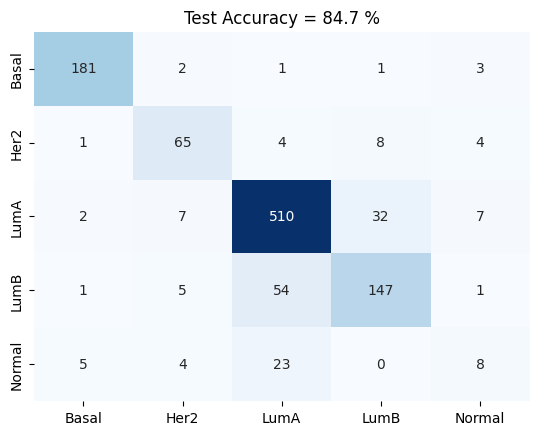

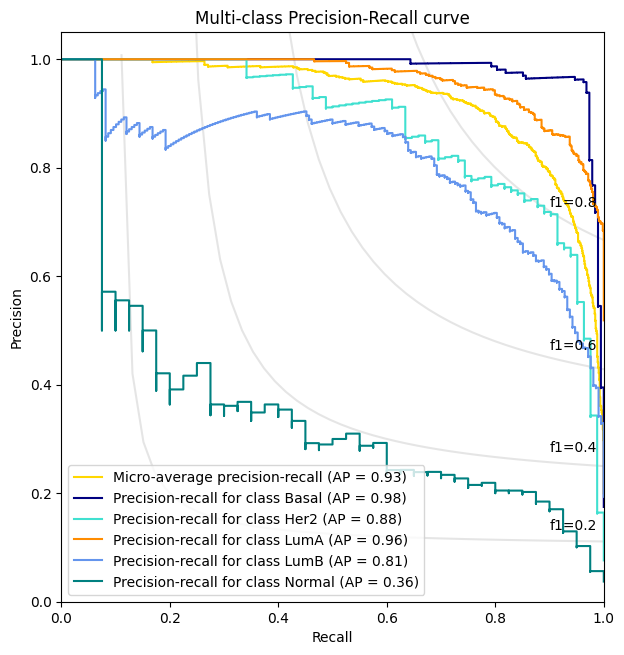

In [6]:
accuracy = []
F1 = []
i = 0
for metric in output_metrics :
    
    accuracy.append(metric[1])
    F1.append(metric[2])


print("%i Fold Cross Validation Accuracy = %2.2f \u00B1 %2.2f" %(5 , np.mean(accuracy)*100 , np.std(accuracy)*100))
print("%i Fold Cross Validation F1 = %2.2f \u00B1 %2.2f" %(5 , np.mean(F1)*100 , np.std(F1)*100))

confusion_matrix(test_logits , test_labels , meta.astype('category').cat.categories)
plt.title('Test Accuracy = %2.1f %%' % (np.mean(accuracy)*100))

precision_recall_plot , all_predictions_conf = AUROC(test_logits, test_labels , meta)

node_predictions = []
true_label = []
display_label = meta.astype('category').cat.categories

for pred , true in zip(all_predictions_conf.argmax(1) , test_labels.argmax(1).detach().cpu())  : 
    node_predictions.append(display_label[pred])
    true_label.append(display_label[true.item()])

tst = pd.DataFrame({'Actual' : true_label , 'Predicted' : node_predictions})